In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

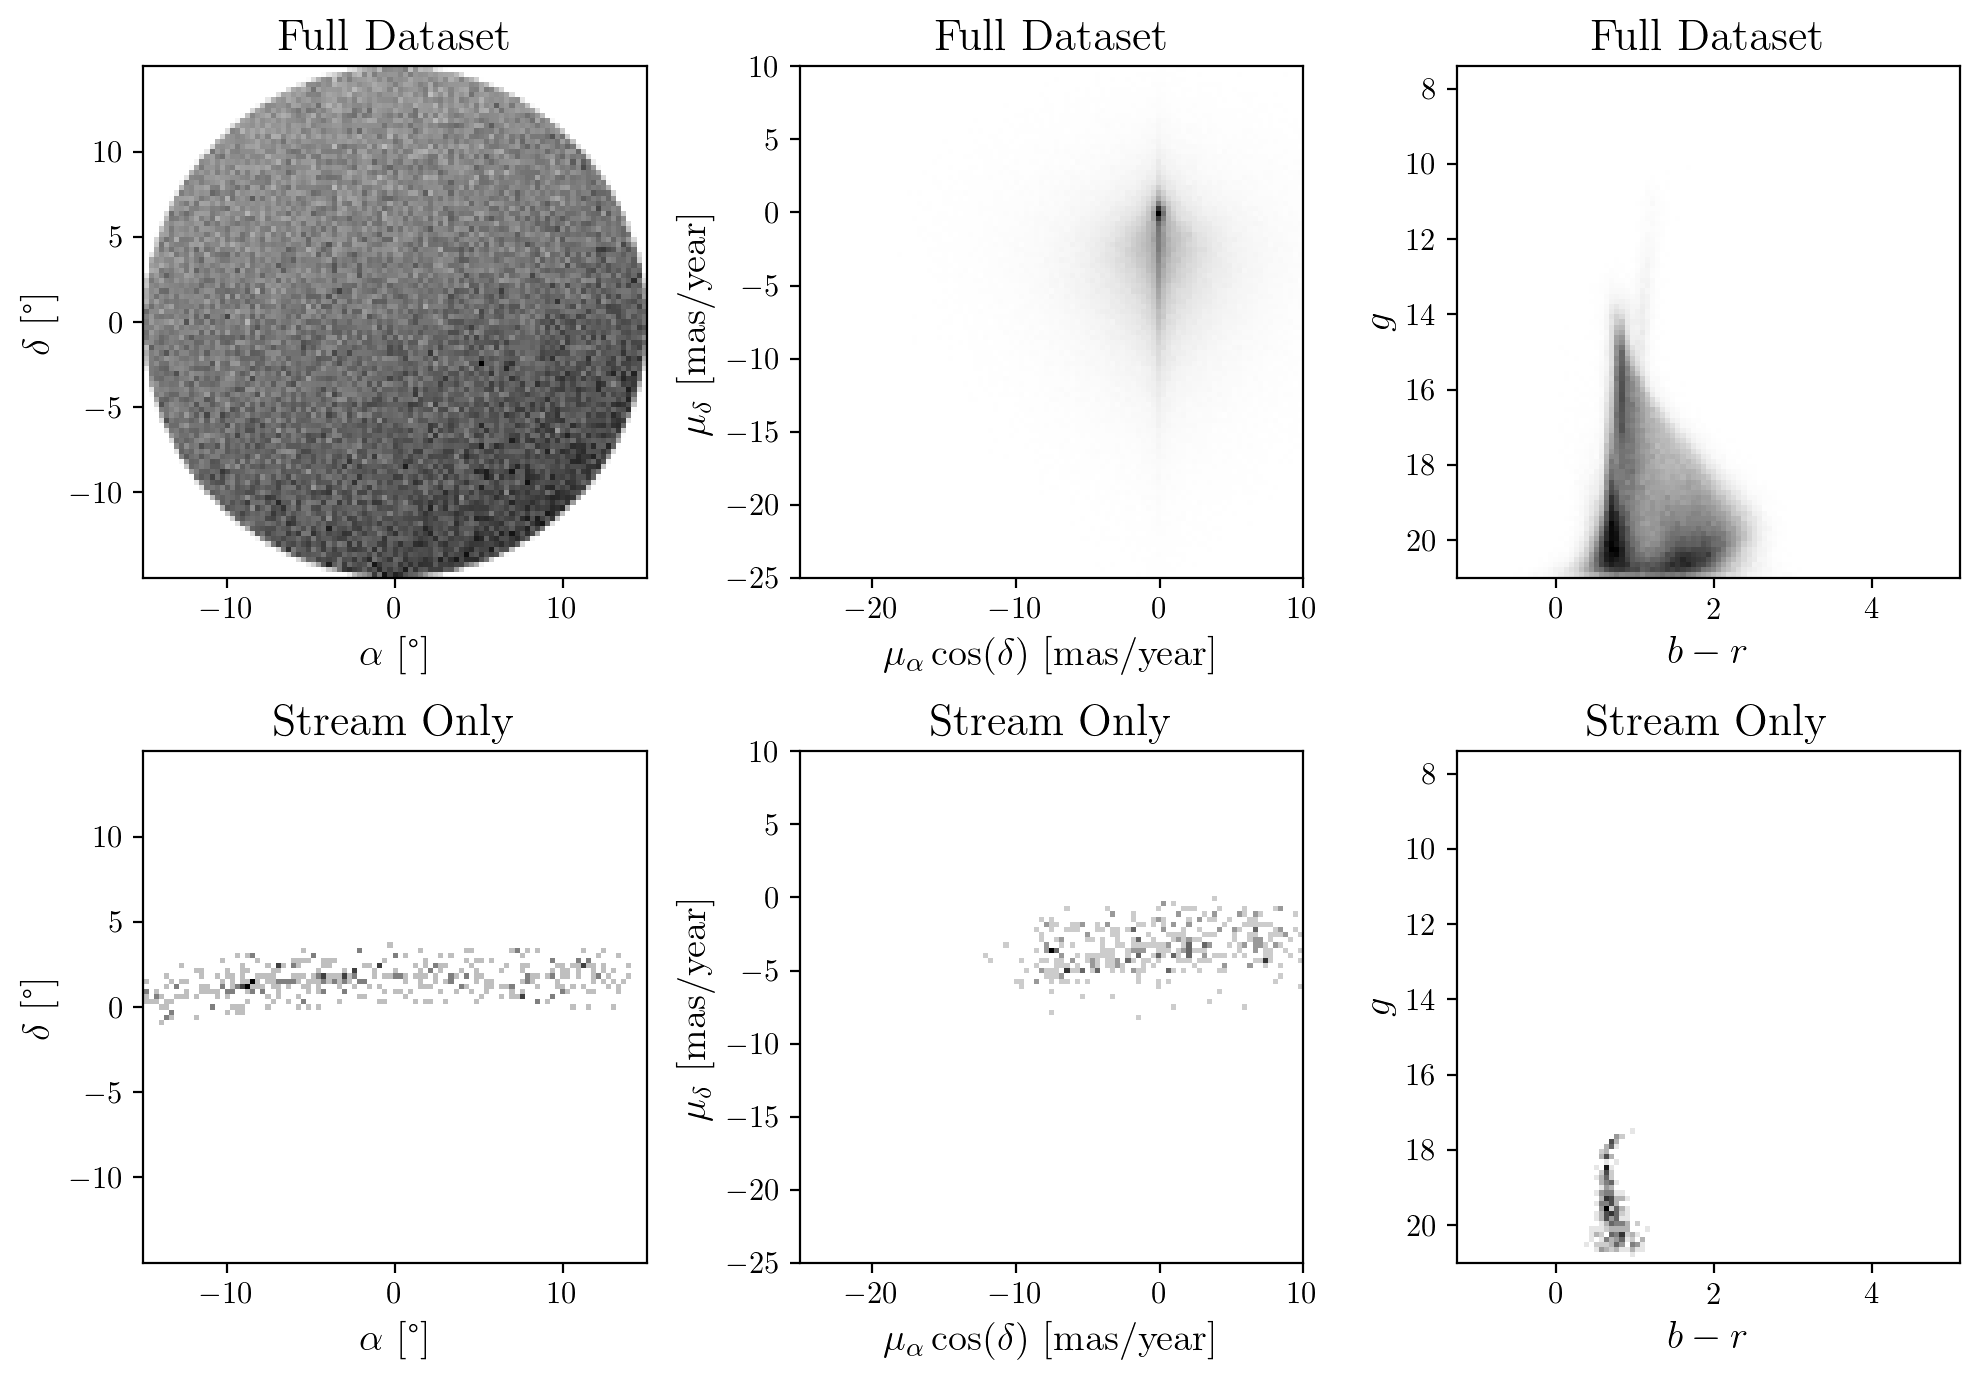

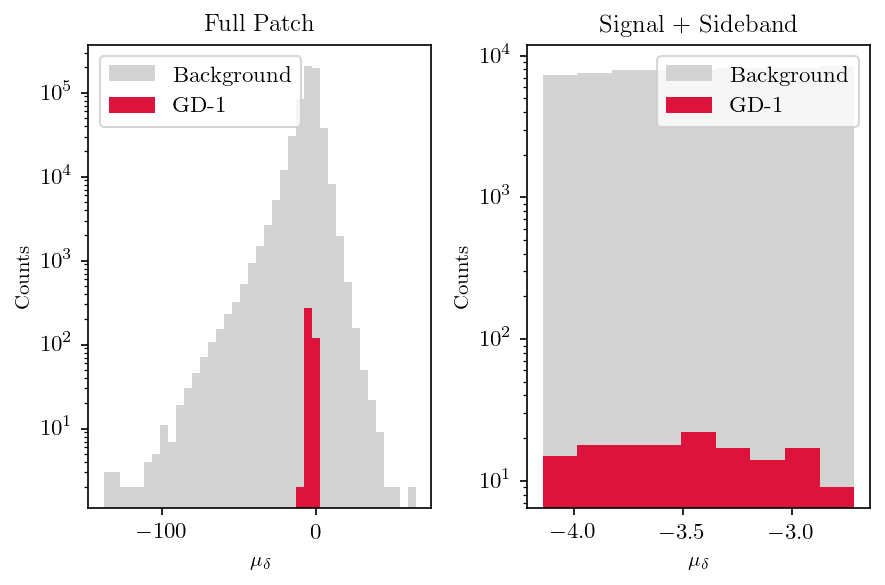

In [7]:
stream = "gd1_tail"
df, file = load_file(stream = stream)
visualize_stream(df, save_folder="gd1_tail")

Sideband region: [-9.0,0.0]
Signal region: [-6.0,-0.5]
Total counts: SR = 260,964, SB = 106,755
Signal region has 381 stream and 260,583 bkg events (0.15%).
Sideband region has 14 stream and 106,741 bkg events (0.01%).
f_sig = 11.1X f_sideband.


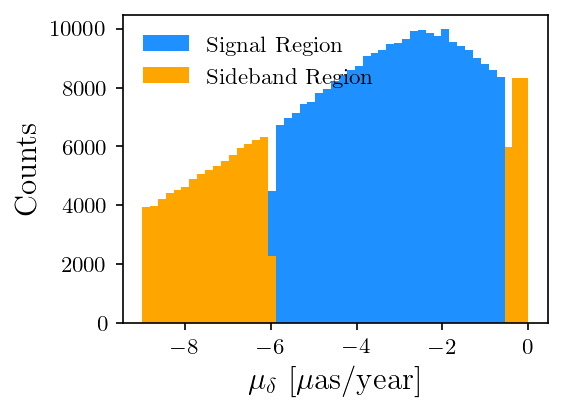

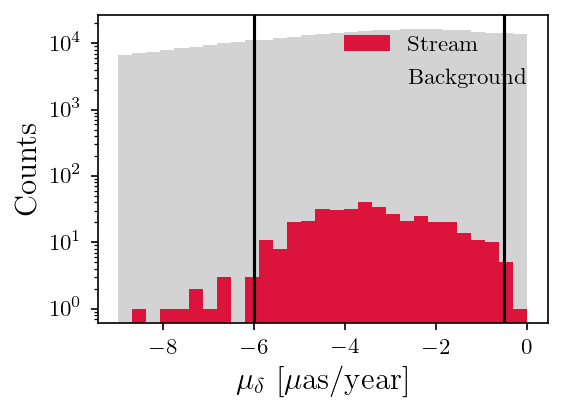

In [16]:
df_slice = signal_sideband(df, stream = stream)

# Train

In [17]:
print("Dataframe has {:,} stars, of which {:,} are stream stars.".format(
    len(df_slice), 
    len(df_slice[df_slice.stream])))

Dataframe has 367,719 stars, of which 395 are stream stars.


[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

2299/2299 [==============================] - 5s 2ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [03:50<11:31, 230.41s/it]

2299/2299 [==============================] - 4s 2ms/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [07:37<07:37, 228.63s/it]

2299/2299 [==============================] - 5s 2ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [11:14<03:43, 223.21s/it]

2299/2299 [==============================] - 4s 2ms/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

2299/2299 [==============================] - 4s 2ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [03:14<09:42, 194.08s/it]

2299/2299 [==============================] - 5s 2ms/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [06:07<06:03, 181.70s/it]

2299/2299 [==============================] - 4s 2ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [09:10<03:02, 182.25s/it]

2299/2299 [==============================] - 4s 2ms/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [02:52<08:36, 172.19s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [05:03<04:56, 148.05s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [07:34<02:29, 149.25s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

2299/2299 [==============================] - 2s 1ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [02:30<07:32, 150.67s/it]

2299/2299 [==============================] - 2s 866us/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [04:13<04:04, 122.35s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [06:34<02:11, 131.09s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):   0%|          | 0/4 [00:00<?, ?it/s]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):  25%|██▌       | 1/4 [02:10<06:31, 130.59s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 2] Validation set (x3):  50%|█████     | 2/4 [04:06<04:03, 121.75s/it]

2299/2299 [==============================] - 4s 2ms/step



[Step 2] Validation set (x3):  75%|███████▌  | 3/4 [05:55<01:56, 116.28s/it]

2299/2299 [==============================] - 3s 1ms/step



[Step 1] k-fold: 100%|██████████| 5/5 [54:02<00:00, 648.56s/it]


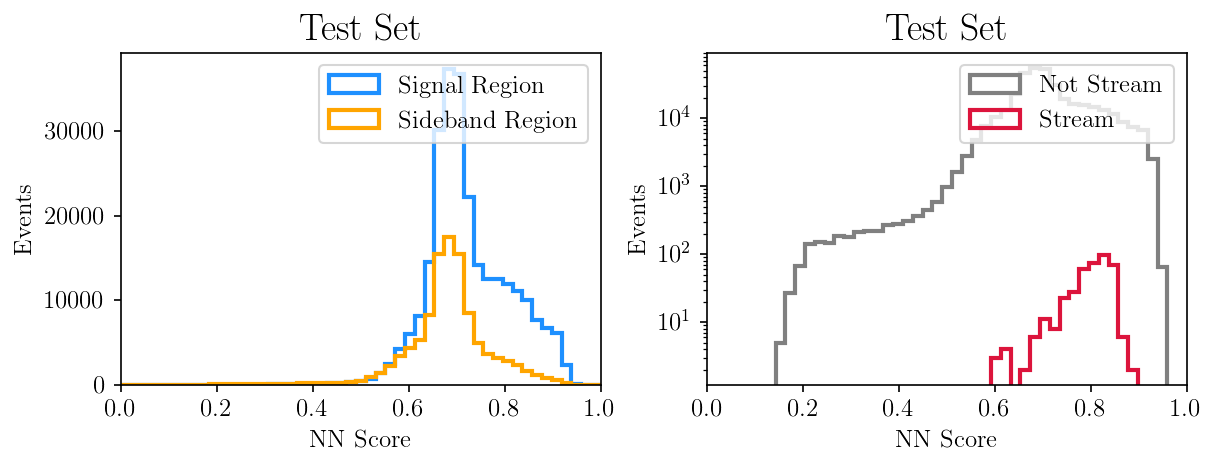

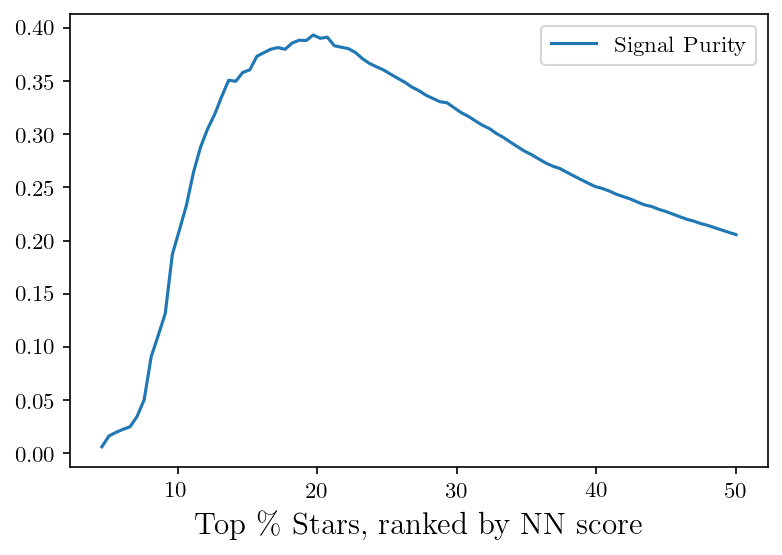

Top 50 stars: Purity = 0.0% 


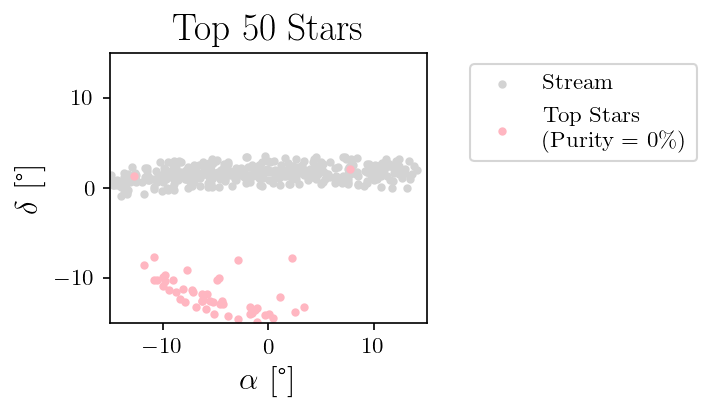

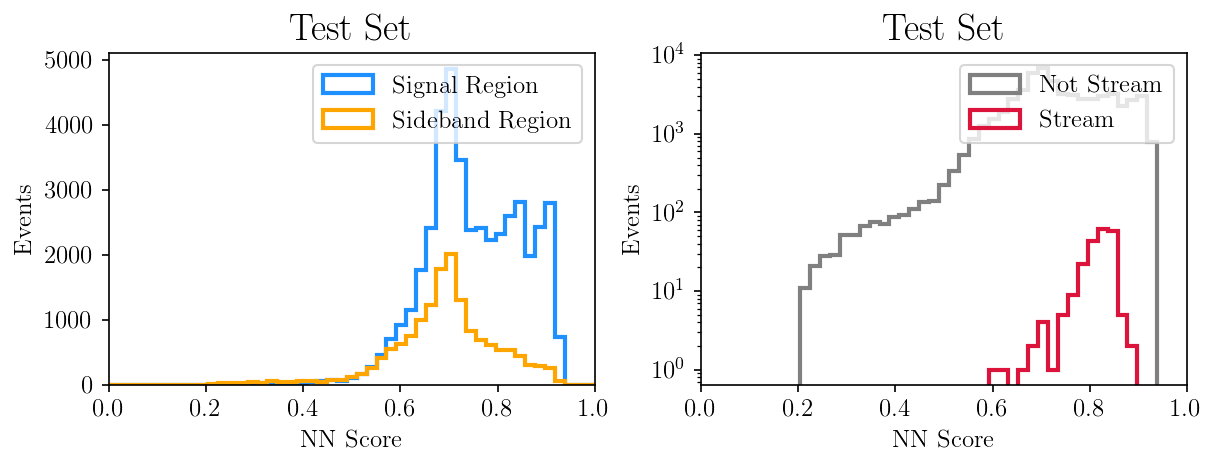

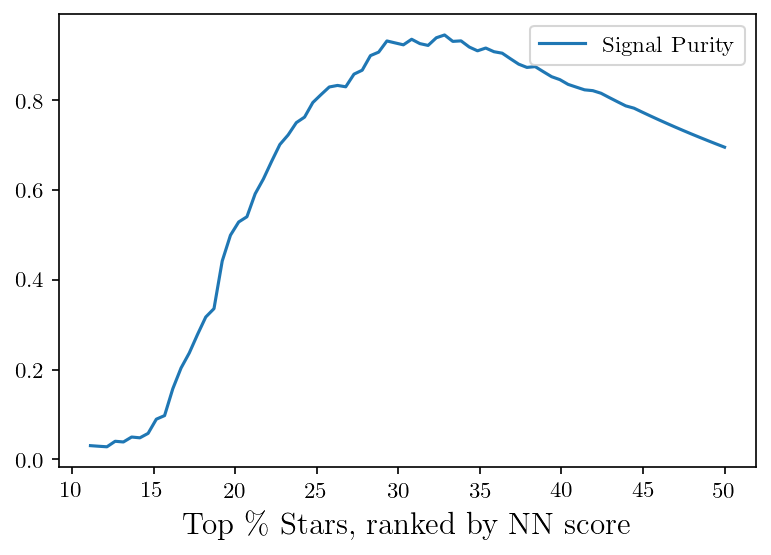

Top 50 stars: Purity = 0.0% 


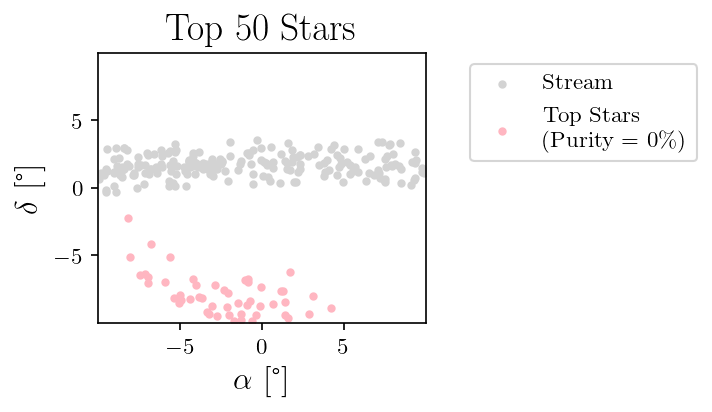

In [20]:
tf.keras.backend.clear_session()
df_test = train(df_slice, 
      n_folds = 5, 
      best_of_n_loops = 3,
      layer_size = 50, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 1000, 
      patience = 20,
      verbose = False,
      save_folder = "gd1_tail_newlimits", 
                        )